# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading & Exploration

In [2]:
car_sales = pd.read_csv("car_sales_dataset.csv")

In [3]:
car_sales.head(5)

Manufacturer   Model  Engine size Fuel type  Year of manufacture  Mileage  \
0         Ford    Puma          1.4    Diesel                 1994   157846   
1          BMW      X3          2.0    Diesel                 1999   311477   
2          BMW      X3          3.0    Diesel                 2004    46905   
3       Toyota  Matrix          1.4    Hybrid                 1985   226031   
4         Ford    Puma          1.8    Diesel                 1995   168255   

   Price  
0   2517  
1   1220  
2  18888  
3    955  
4   2796

In [4]:
car_sales.dtypes

Manufacturer            object
Model                   object
Engine size            float64
Fuel type               object
Year of manufacture      int64
Mileage                  int64
Price                    int64
dtype: object

In [5]:
car_sales.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [6]:
car_sales.shape

(55000, 7)

# Exercise 1: a

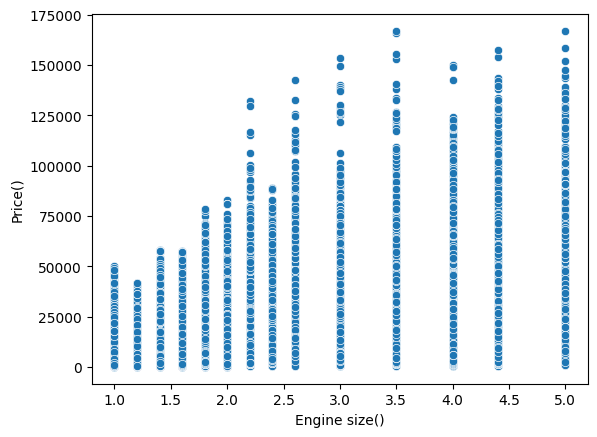

In [7]:
sns.scatterplot(data = car_sales, x = "Engine size",y = "Price")

# Label both axes
plt.xlabel("Engine size()")
plt.ylabel("Price()")

# Show the figure
plt.show()

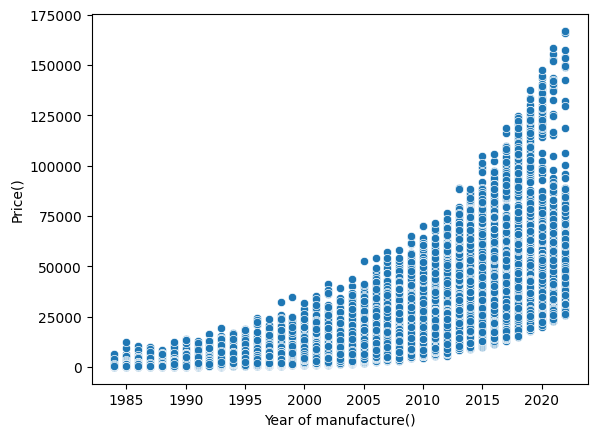

In [8]:
sns.scatterplot(data = car_sales, x = "Year of manufacture",y = "Price")

# Label both axes
plt.xlabel("Year of manufacture()")
plt.ylabel("Price()")

# Show the figure
plt.show()

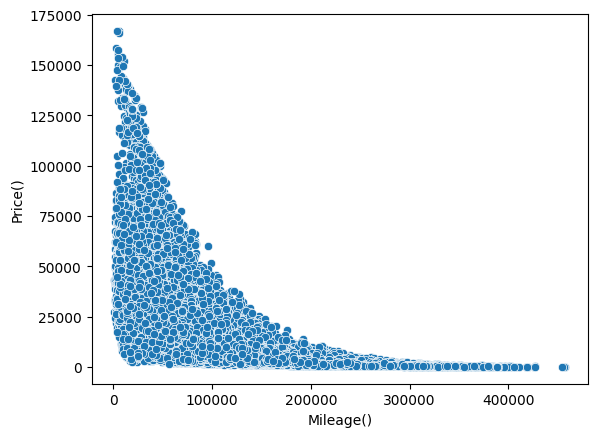

In [9]:
sns.scatterplot(data = car_sales, x = "Mileage",y = "Price")

# Label both axes
plt.xlabel("Mileage()")
plt.ylabel("Price()")

# Show the figure
plt.show()

<Axes: >

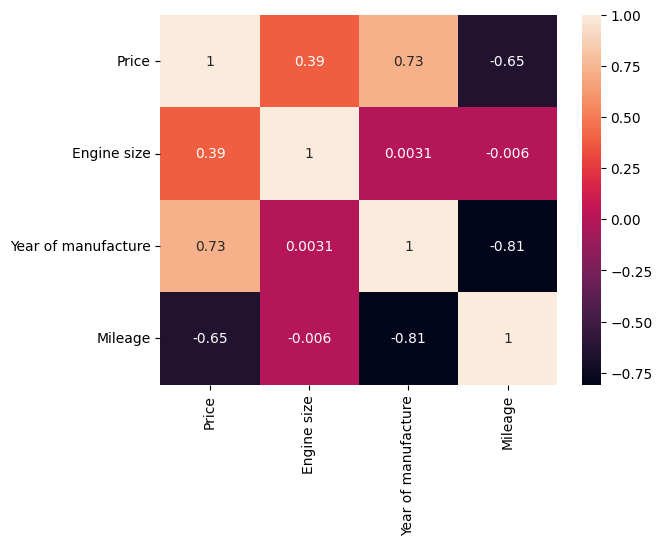

In [10]:
 # let's plot this in confusion Matrix.
column_list = ["Price", "Engine size", "Year of manufacture", "Mileage"]
sns.heatmap(car_sales[column_list].corr(), annot = True)

# Exercise 1:
# Analysing Second Hand Car Sales Data with Supervised & Unsupervised Learning Models

# Exercise 1.a

In [11]:
# Importing Libraries:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

gradient:  11896.716627342466
intercept:  14058.096813560674
Mean absolute error:  7058.193408426033
Mean squared error:  125138115.69521888
Root mean squared error:  11186.51490390188
R2:  0.5296522186924904


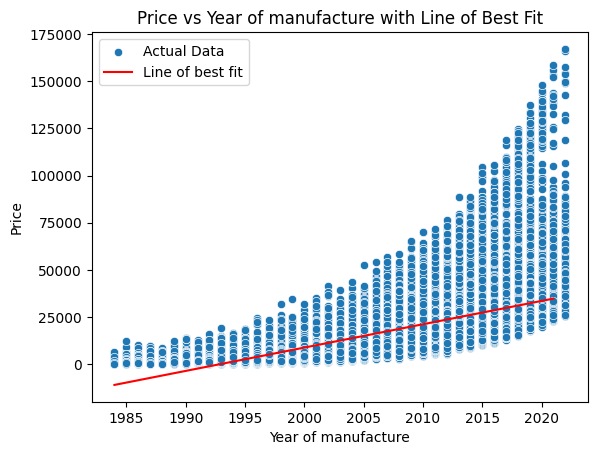

In [12]:
#  A Simple Linear Regression Model: 
def plot_line_of_best_fit(df, x_column, y_column, test_size=0.2, random_state=42, figsize=(10, 6)):
    # Create a copy of the DataFrame to avoid modifying the original
    car_sales = df.copy()

    # Prepare the data
    x = car_sales[x_column]
    y = car_sales[y_column]

    x = x.to_numpy().reshape(-1, 1)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    # Scale the data
    scale = StandardScaler()
    scale.fit(x)

    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)

    # Train the linear regression model
    price_linear = LinearRegression()
    price_linear.fit(x_train_scaled, y_train)

    # Calculate the gradient and intercept
    gradient = price_linear.coef_[0]
    intercept = price_linear.intercept_
    print("gradient: ", gradient)
    print("intercept: ", intercept)

    # Calculate the evaluation metrics
    price_pred = price_linear.predict(x_test_scaled)

    mean_abs = mean_absolute_error(y_test, price_pred)
    mean_squared = mean_squared_error(y_test, price_pred)
    rms_error = np.sqrt(mean_squared)
    R2 = r2_score(y_test, price_pred)

    print("Mean absolute error: ", mean_abs)
    print("Mean squared error: ", mean_squared)
    print("Root mean squared error: ", rms_error)
    print("R2: ", R2)

    # Prepare the x range for the line of best fit
    x_fit = np.arange(car_sales[x_column].min(), car_sales[x_column].max(), 1).reshape(-1, 1)
    x_fit_scaled = scale.transform(x_fit)

    # Calculate the y values for the line of best fit
    y_fit = price_linear.predict(x_fit_scaled)

    # Create the scatter plot with the specified figsize
    sns.scatterplot(data=car_sales, x=x_column, y=y_column, label='Actual Data')

    # Add the line of best fit
    plt.plot(x_fit, y_fit, color='red', label='Line of best fit')

    # Add axis labels and a plot title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title("{} vs {} with Line of Best Fit".format(y_column, x_column))

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage :  Price vs Year of manufacture
plot_line_of_best_fit(df=car_sales, x_column="Year of manufacture", y_column="Price")

gradient:  6387.832326876927
intercept:  14072.459611176087
Mean absolute error:  10970.085059615805
Mean squared error:  228864284.82207787
Root mean squared error:  15128.26113015233
R2:  0.13978400594770124


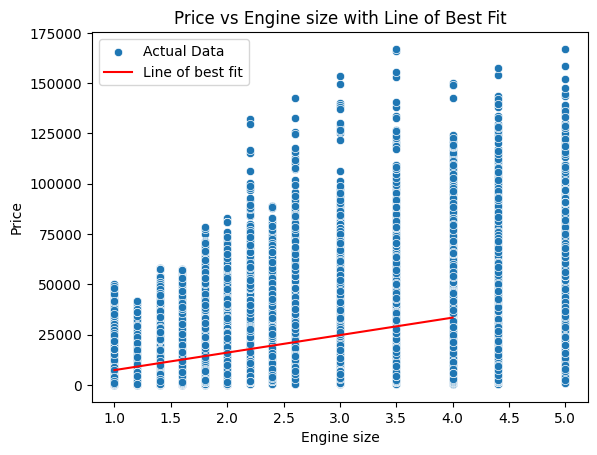

In [13]:
# Example usage :  Price vs Engine size
plot_line_of_best_fit(df=car_sales, x_column="Engine size", y_column="Price")

gradient:  -10577.119413114464
intercept:  14061.866596097669
Mean absolute error:  8036.38630115767
Mean squared error:  154651643.40685615
Root mean squared error:  12435.901391007254
R2:  0.4187218103144724


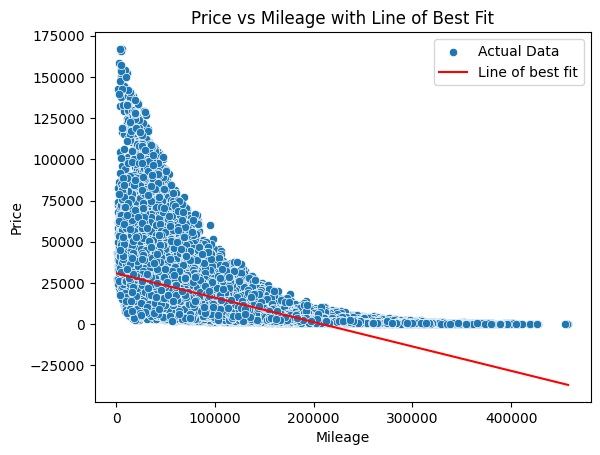

In [14]:
# # Example usage :  Price vs Mileage
plot_line_of_best_fit(df=car_sales, x_column= "Mileage", y_column="Price")

# Polynomial Model of Degree 3

Mean absolute error:  5185.925400328029
Mean squared error:  97708706.08341861
Root mean squared error:  9884.771422922162
R2:  0.6327491998305727


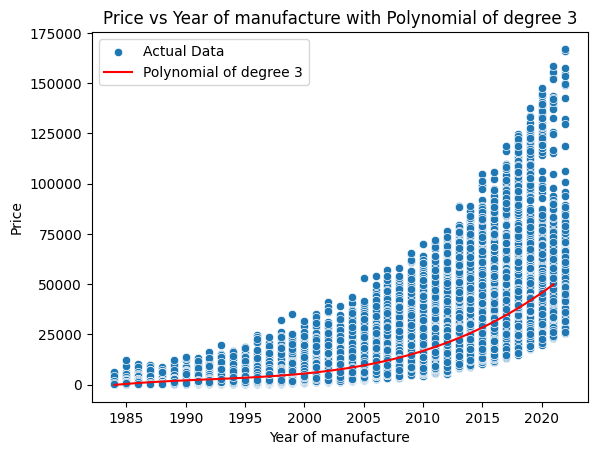

In [15]:
# Polynomial Regression Model of degree 3 : 

from sklearn.preprocessing import PolynomialFeatures

def plot_polynomial_model(df, x_column, y_column, degree=2, test_size=0.2, random_state=42, figsize=(10, 6)):
    # Create a copy of the DataFrame to avoid modifying the original
    car_sales = df.copy()

    # Prepare the data
    x = car_sales[x_column]
    y = car_sales[y_column]

    x = x.to_numpy().reshape(-1, 1)

    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

    # Create a polynomial feature matrix
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(x_train)

    # Train the polynomial regression model
    price_poly = LinearRegression()
    price_poly.fit(X_poly, y_train)

    # Calculate the evaluation metrics
    X_poly_test = poly.transform(x_test)
    price_pred = price_poly.predict(X_poly_test)

    mean_abs = mean_absolute_error(y_test, price_pred)
    mean_squared = mean_squared_error(y_test, price_pred)
    rms_error = np.sqrt(mean_squared)
    R2 = r2_score(y_test, price_pred)

    print("Mean absolute error: ", mean_abs)
    print("Mean squared error: ", mean_squared)
    print("Root mean squared error: ", rms_error)
    print("R2: ", R2)

    # Prepare the x range for the line of best fit
    x_fit = np.arange(car_sales[x_column].min(), car_sales[x_column].max(), 1).reshape(-1, 1)
    x_fit_poly = poly.transform(x_fit)

    # Calculate the y values for the line of best fit
    y_fit = price_poly.predict(x_fit_poly)

    # Create the scatter plot with the specified figsize
    sns.scatterplot(data=car_sales, x=x_column, y=y_column, label='Actual Data')

    # Add the line of best fit
    plt.plot(x_fit, y_fit, color='red', label='Polynomial of degree {}'.format(degree))

    # Add axis labels and a plot title
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title("{} vs {} with Polynomial of degree {}".format(y_column, x_column, degree))

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

# Example usage : Price vs Year of manufacture of degree 3
plot_polynomial_model(df=car_sales, x_column="Year of manufacture", y_column="Price", degree=3)


Mean absolute error:  10970.557080580833
Mean squared error:  228618572.71518493
Root mean squared error:  15120.137985983623
R2:  0.1407075466585025


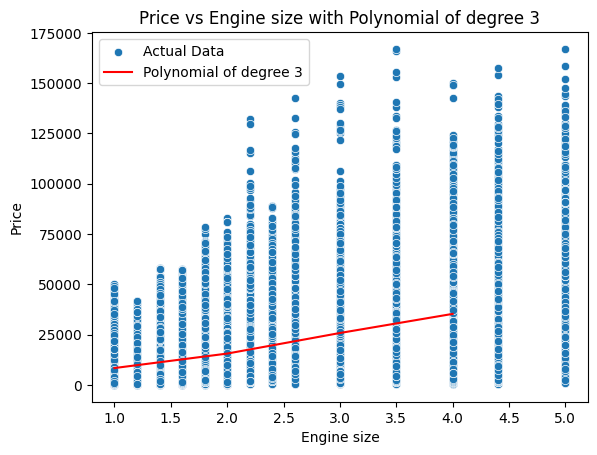

In [16]:
# Example usage : Price vs Engine size of degree 3
plot_polynomial_model(df=car_sales, x_column="Engine size", y_column="Price", degree=3)

Mean absolute error:  5824.43039255694
Mean squared error:  115050336.50365128
Root mean squared error:  10726.151989583743
R2:  0.5675684405783148


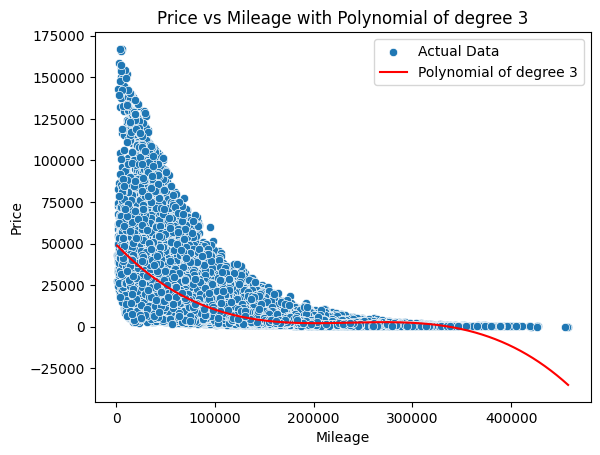

In [17]:
# Example usage : Price vs Mileage of degree 3
plot_polynomial_model(df=car_sales, x_column="Mileage", y_column="Price", degree=3)

# Polynomial Model of Degree 4

Mean absolute error:  5185.479942118124
Mean squared error:  97707742.96268399
Root mean squared error:  9884.722705401704
R2:  0.6327528198443322


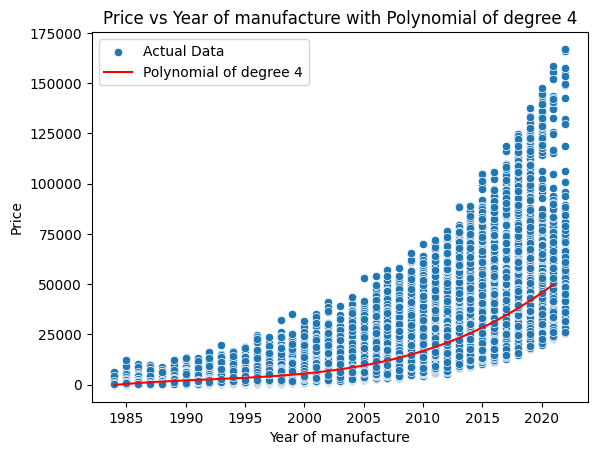

In [18]:
# Example usage : Price vs Year of manufacture of degree 4
plot_polynomial_model(df=car_sales, x_column="Year of manufacture", y_column="Price", degree=4)

Mean absolute error:  10970.306906955771
Mean squared error:  228675624.90616632
Root mean squared error:  15122.024497605018
R2:  0.14049310862499242


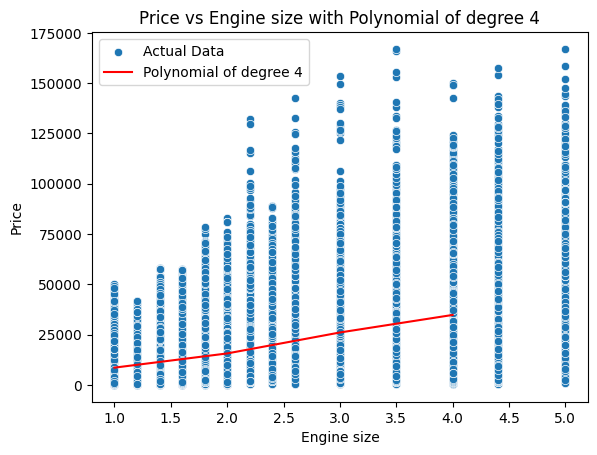

In [19]:
# Example usage : Price vs Engine size of degree 4
plot_polynomial_model(df=car_sales, x_column="Engine size", y_column="Price", degree=4)

Mean absolute error:  6754.363832370695
Mean squared error:  130428549.27718893
Root mean squared error:  11420.531917436636
R2:  0.5097674403129369


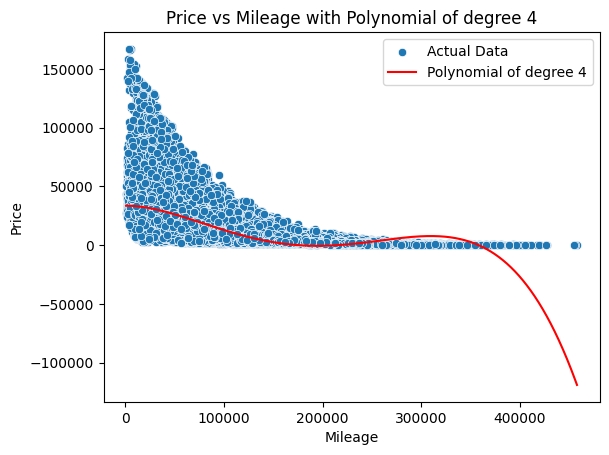

In [20]:
# Example usage : Price vs Mileage of degree 4
plot_polynomial_model(df=car_sales, x_column="Mileage", y_column="Price", degree=4)

# Exercise 1:b

# A Multiple Linear Regression Model

In [21]:


# Prepare the data
X = car_sales[['Year of manufacture', 'Engine size', 'Mileage']]
y = car_sales['Price']

# Scale the data
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate the evaluation metrics
y_pred = model.predict(X_test)
mean_abs = mean_absolute_error(y_test, y_pred)
mean_squared = mean_squared_error(y_test, y_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, y_pred)

print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  6167.885702759869
Mean squared error:  84405262.3572687
Root mean squared error:  9187.233661841236
R2:  0.682751912477963


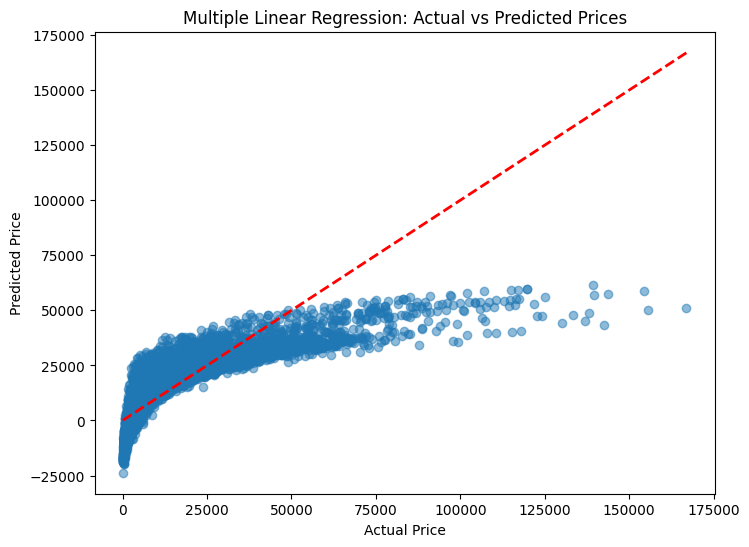

In [22]:
# Create a scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Perfect fit line
plt.show()

# Exercise 1:c

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Separate the target variable
y = car_sales['Price']

# Separate the categorical and numerical variables
categorical_vars = ['Manufacturer', 'Model', 'Fuel type']
numerical_vars = ['Year of manufacture', 'Engine size', 'Mileage']

# Encode the categorical variables
encoders = []
for cat_var in categorical_vars:
    encoder = LabelEncoder()
    car_sales[cat_var] = encoder.fit_transform(car_sales[cat_var])
    encoders.append(encoder)

# One-hot encode the categorical variables
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_vars)], 
    remainder='passthrough'
)
X = ct.fit_transform(car_sales[categorical_vars + numerical_vars])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Calculate the evaluation metrics
y_pred = model.predict(X_test)
mean_abs = mean_absolute_error(y_test, y_pred)
mean_squared = mean_squared_error(y_test, y_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, y_pred)

print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  332.56647272727275
Mean squared error:  514920.328009091
Root mean squared error:  717.5794924669259
R2:  0.998064605396336


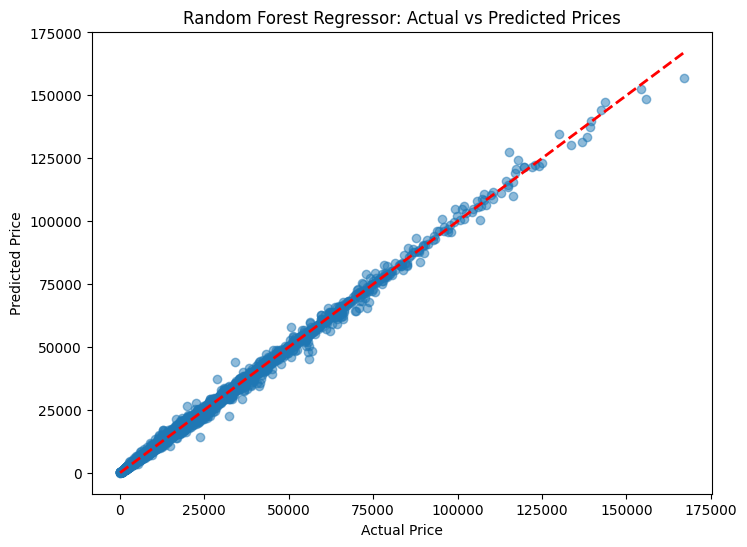

In [24]:
# Create a scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regressor: Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)  # Perfect fit line
plt.show()

# Exercise 1: d

In [25]:
# No early Stopping
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



def build_ann_model(df, input_cols, output_col, hidden_layers, hidden_nodes, epochs, batch_size):
    # Prepare the data
    X = car_sales.drop(columns=[output_col])
    y = car_sales[output_col]

    # Scale the numerical variables
    scaler = StandardScaler()
    X_numerical = scaler.fit_transform(X[input_cols['numerical']])

    # One-hot encode the categorical variables
    X_categorical = pd.get_dummies(X[input_cols['categorical']])

    # Combine the scaled numerical and one-hot encoded categorical variables
    X = np.hstack((X_numerical, X_categorical.values))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the input layer
    input_layer = Input(shape=(X.shape[1],))

    # Define the ANN model
    x = Dense(hidden_nodes, activation='relu')(input_layer)
    for i in range(len(hidden_layers)):
        x = Dense(hidden_layers[i], activation='relu')(x)
    output_layer = Dense(1)(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    # Calculate the evaluation metrics
    y_pred = model.predict(X_test)
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    rms_error = np.sqrt(mean_squared)
    R2 = r2_score(y_test, y_pred)

    print("Mean absolute error: ", mean_abs)
    print("Mean squared error: ", mean_squared)
    print("Root mean squared error: ", rms_error)
    print("R2: ", R2)

    
    
   

    return model, scaler

# Example usage
input_cols = {'numerical': ['Year of manufacture', 'Engine size', 'Mileage'],
              'categorical': ['Manufacturer', 'Model', 'Fuel type']}
output_col = 'Price'
hidden_layers = [64, 32]
hidden_nodes = 64
epochs = 10
batch_size = 32

model, scaler = build_ann_model(car_sales, input_cols, output_col, hidden_layers, hidden_nodes, epochs, batch_size)

Epoch 1/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 262508384.0000 - val_loss: 28817630.0000
Epoch 2/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 26022478.0000 - val_loss: 22886654.0000
Epoch 3/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 21773346.0000 - val_loss: 20009558.0000
Epoch 4/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19075310.0000 - val_loss: 17451840.0000
Epoch 5/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 16196847.0000 - val_loss: 15280843.0000
Epoch 6/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 13621808.0000 - val_loss: 13664529.0000
Epoch 7/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12477718.0000 - val_loss: 12925268.0000
Epoch 8/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12258473.0000 - val_loss: 11471065.0000
Epoch 9/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10628716.0000 - val_loss: 10714735.0000
Epoch 10/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9571840.0000 - val

In [26]:
# Example usage : epoch = 5

hidden_layers = [64, 32]
hidden_nodes = 64
epochs = 5
batch_size = 32

model, scaler = build_ann_model(car_sales, input_cols, output_col, hidden_layers, hidden_nodes, epochs, batch_size)

Epoch 1/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 256006624.0000 - val_loss: 27882104.0000
Epoch 2/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 26155930.0000 - val_loss: 22399324.0000
Epoch 3/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20329564.0000 - val_loss: 19611506.0000
Epoch 4/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18867346.0000 - val_loss: 17424994.0000
Epoch 5/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 15717235.0000 - val_loss: 15638970.0000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean absolute error:  1904.0724218222879
Mean squared error:  15638973.031876788
Root mean squared error:  3954.614144499661
R2:  0.941218898601713


Epoch 1/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 253828656.0000 - val_loss: 27375140.0000
Epoch 2/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 25564438.0000 - val_loss: 22926382.0000
Epoch 3/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 21305038.0000 - val_loss: 20465190.0000
Epoch 4/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 19072738.0000 - val_loss: 18005384.0000
Epoch 5/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 16611113.0000 - val_loss: 16401733.0000
Epoch 6/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 14679170.0000 - val_loss: 15532553.0000
Epoch 7/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 14030750.0000 - val_loss: 14583290.0000
Epoch 8/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 13958923.0000 - val_loss: 14398587.0000
Epoch 9/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12968474.0000 - val_loss: 13602572.0000
Epoch 10/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12524959.0000 - va

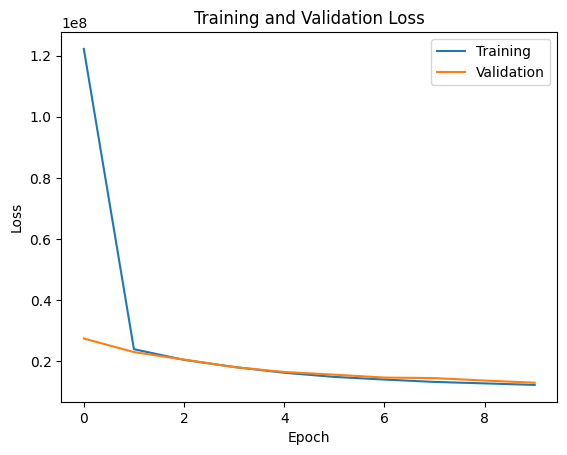

In [27]:
# Early Stopping and Hyperparameter tuning
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def build_ann_model(df, input_cols, output_col, hidden_layers, hidden_nodes, epochs, batch_size):
    # Prepare the data
    X = car_sales.drop(columns=[output_col])
    y = car_sales[output_col]

    # Scale the numerical variables
    scaler = StandardScaler()
    X_numerical = scaler.fit_transform(X[input_cols['numerical']])

    # One-hot encode the categorical variables
    X_categorical = pd.get_dummies(X[input_cols['categorical']])

    # Combine the scaled numerical and one-hot encoded categorical variables
    X = np.hstack((X_numerical, X_categorical.values))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the input layer
    input_layer = Input(shape=(X.shape[1],))

    # Define the ANN model
    x = Dense(hidden_nodes, activation='relu')(input_layer)
    for i in range(len(hidden_layers)):
        x = Dense(hidden_layers[i], activation='relu')(x)
    output_layer = Dense(1)(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Calculate the evaluation metrics
    y_pred = model.predict(X_test)
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    rms_error = np.sqrt(mean_squared)
    R2 = r2_score(y_test, y_pred)

    print("Mean absolute error: ", mean_abs)
    print("Mean squared error: ", mean_squared)
    print("Root mean squared error: ", rms_error)
    print("R2: ", R2)

    # Plot the training and validation losses
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

    return model, scaler

# Example usage
input_cols = {'numerical': ['Year of manufacture', 'Engine size', 'Mileage'],
              'categorical': ['Manufacturer', 'Model', 'Fuel type']}
output_col = 'Price'
hidden_layers = [64, 32]
hidden_nodes = 64
epochs = 10
batch_size = 32

model, scaler = build_ann_model(car_sales, input_cols, output_col, hidden_layers, hidden_nodes, epochs, batch_size)

Epoch 1/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 257755552.0000 - val_loss: 29012560.0000
Epoch 2/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 27254704.0000 - val_loss: 24075948.0000
Epoch 3/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22360660.0000 - val_loss: 21365258.0000
Epoch 4/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19959932.0000 - val_loss: 19431184.0000
Epoch 5/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18054264.0000 - val_loss: 17892020.0000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean absolute error:  2159.5451304709695
Mean squared error:  17892016.686715517
Root mean squared error:  4229.895588157646
R2:  0.9327505428305317


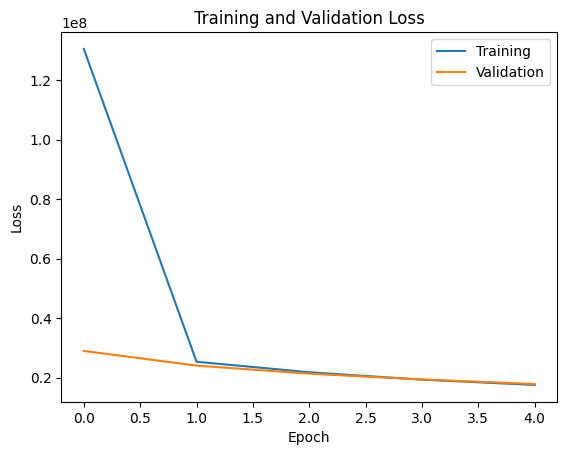

In [28]:
# early stopping with epoch = 5

hidden_layers = [64, 32]
hidden_nodes = 64
epochs = 5
batch_size = 32

model, scaler = build_ann_model(car_sales, input_cols, output_col, hidden_layers, hidden_nodes, epochs, batch_size)

In [29]:
# Adding dropout layer and leaning rate with 3 hidden layers with 64 neurons each and the ReLU activation function with epoch = 10

Epoch 1/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 191871392.0000 - val_loss: 22887928.0000
Epoch 2/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 30427942.0000 - val_loss: 18665204.0000
Epoch 3/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 28072490.0000 - val_loss: 21239870.0000
Epoch 4/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 24792734.0000 - val_loss: 13313847.0000
Epoch 5/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 21615042.0000 - val_loss: 11826838.0000
Epoch 6/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 20648316.0000 - val_loss: 10361975.0000
Epoch 7/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19953018.0000 - val_loss: 8687662.0000
Epoch 8/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 18362598.0000 - val_loss: 7987164.5000
Epoch 9/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 19661166.0000 - val_loss: 9628500.0000
Epoch 10/10
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 18489616.0000 - val_l

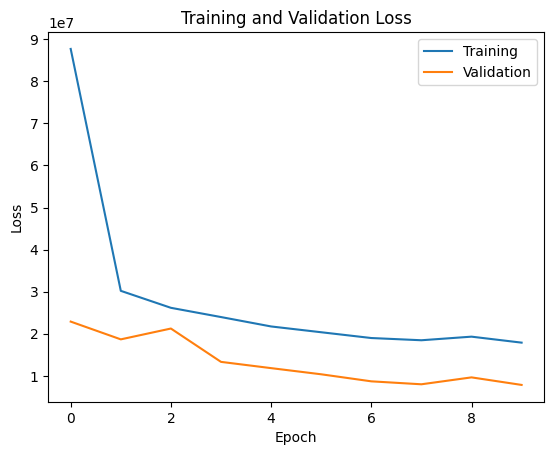

In [30]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


def build_ann_model(df, input_cols, output_col, hidden_layers, hidden_nodes, epochs, batch_size, dropout_rate, learning_rate):
    # Prepare the data
    X = car_sales.drop(columns=[output_col])
    y = car_sales[output_col]

    # Scale the numerical variables
    scaler = StandardScaler()
    X_numerical = scaler.fit_transform(X[input_cols['numerical']])

    # One-hot encode the categorical variables
    X_categorical = pd.get_dummies(X[input_cols['categorical']])

    # Combine the scaled numerical and one-hot encoded categorical variables
    X = np.hstack((X_numerical, X_categorical.values))

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the input layer
    input_layer = Input(shape=(X.shape[1],))

    # Define the ANN model
    x = Dense(hidden_nodes, activation='relu')(input_layer)
    x = Dropout(dropout_rate)(x)
    for i in range(len(hidden_layers)):
        x = Dense(hidden_layers[i], activation='relu')(x)
        x = Dropout(dropout_rate)(x)
    output_layer = Dense(1)(x)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Calculate the evaluation metrics
    y_pred = model.predict(X_test)
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    rms_error = np.sqrt(mean_squared)
    R2 = r2_score(y_test, y_pred)

    print("Mean absolute error: ", mean_abs)
    print("Mean squared error: ", mean_squared)
    print("Root mean squared error: ", rms_error)
    print("R2: ", R2)

    # Plot the training and validation losses
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()

    return model, scaler



# Define the input and output columns
input_cols = {'numerical': ['Year of manufacture', 'Engine size', 'Mileage'],
              'categorical': ['Manufacturer', 'Model', 'Fuel type']}
output_col = 'Price'

# Define the ANN architecture
hidden_layers = [64, 64, 64]
hidden_nodes = 64
epochs = 10
batch_size = 32
dropout_rate = 0.2
learning_rate = 0.001

# Build the ANN model
model, scaler = build_ann_model(car_sales, input_cols, output_col, hidden_layers, hidden_nodes, epochs, batch_size, dropout_rate, learning_rate)

Epoch 1/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 189398304.0000 - val_loss: 23282014.0000
Epoch 2/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32008894.0000 - val_loss: 18718838.0000
Epoch 3/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 28467044.0000 - val_loss: 15841031.0000
Epoch 4/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 23052054.0000 - val_loss: 13875867.0000
Epoch 5/5
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 23608748.0000 - val_loss: 13872693.0000
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean absolute error:  1813.3696836492365
Mean squared error:  13872690.50351785
Root mean squared error:  3724.606087026902
R2:  0.9478576997676122


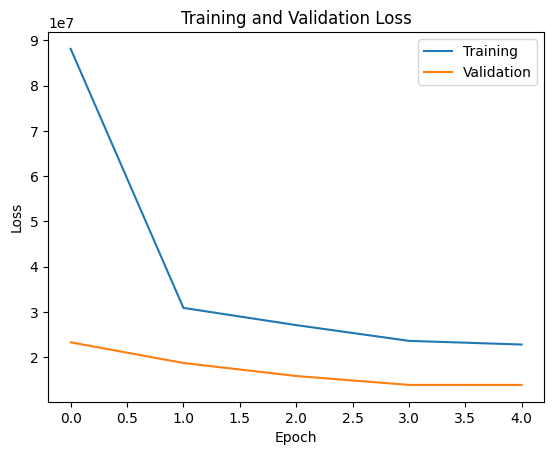

In [31]:
# Define the ANN architecture with epoch = 5
hidden_layers = [64, 64, 64]
hidden_nodes = 64
epochs = 5
batch_size = 32
dropout_rate = 0.2
learning_rate = 0.001

# Build the ANN model
model, scaler = build_ann_model(car_sales, input_cols, output_col, hidden_layers, hidden_nodes, epochs, batch_size, dropout_rate, learning_rate)

# Exercise 1:f

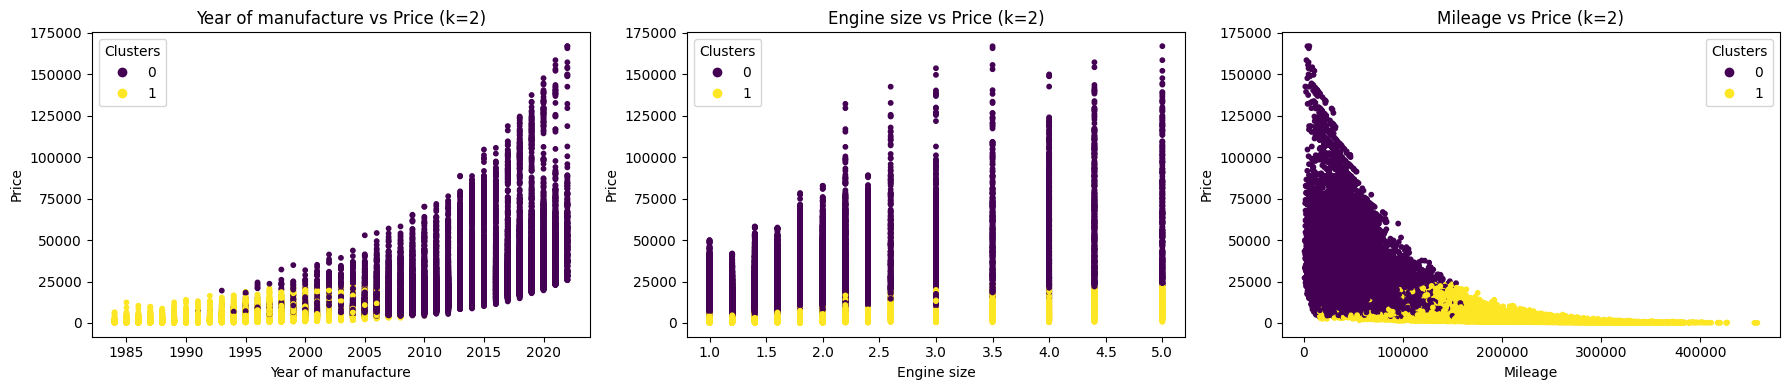

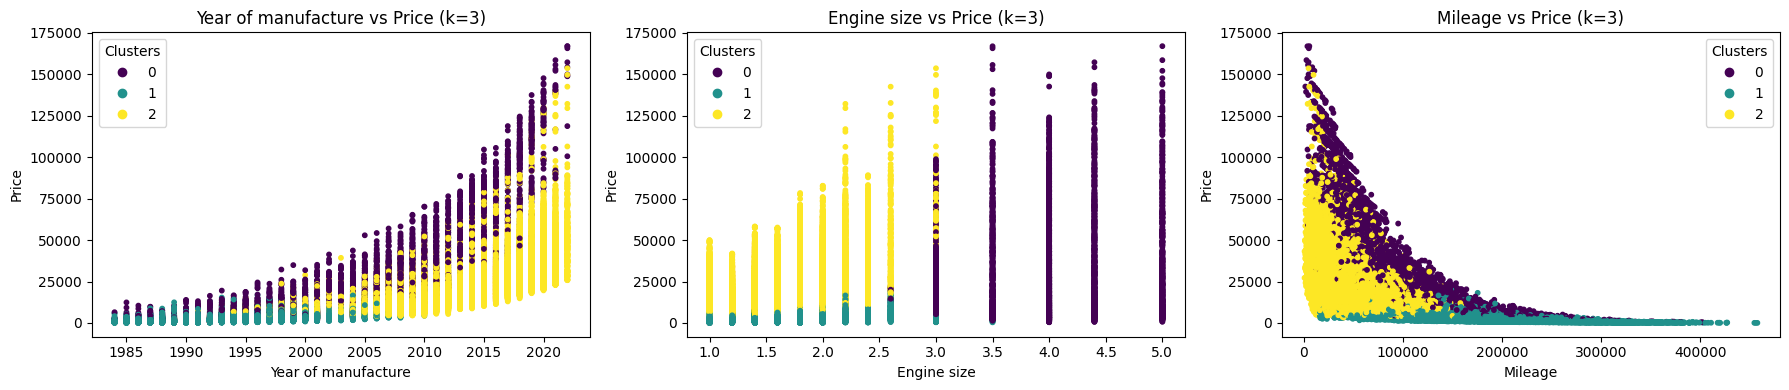

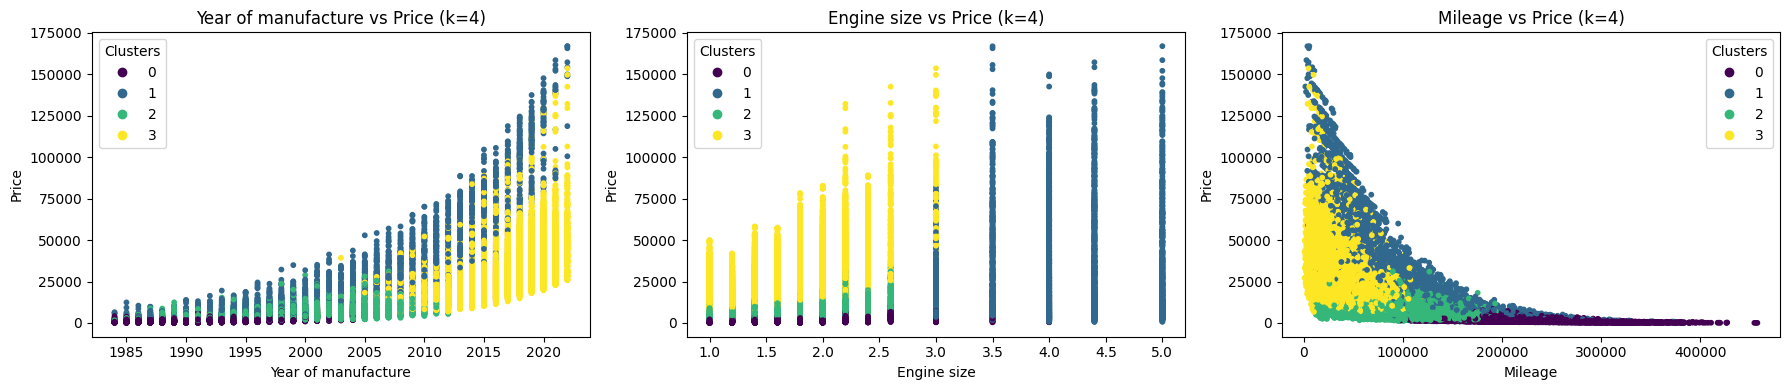

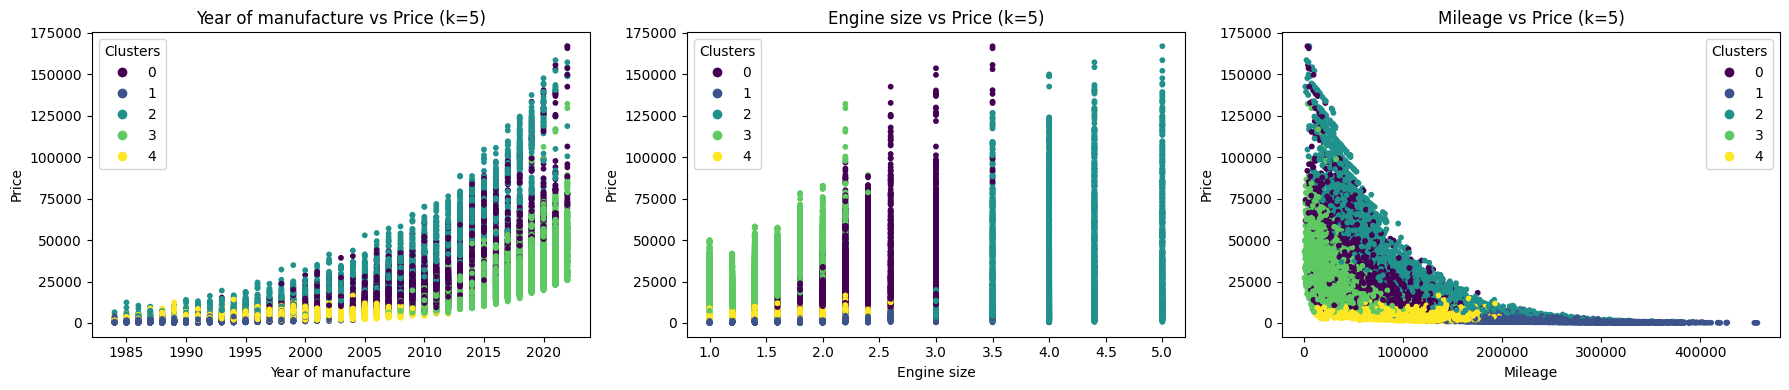

Clustering results:
k=2, Silhouette score=0.402, Davies Bouldin index=0.982
k=3, Silhouette score=0.441, Davies Bouldin index=0.801
k=4, Silhouette score=0.349, Davies Bouldin index=0.949
k=5, Silhouette score=0.299, Davies Bouldin index=1.055


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

def kmeans_clustering(df, input_cols, output_col, k_values):
    """
    Performs k-Means clustering on the input data with different values of k.

    Parameters:
    df (pandas DataFrame): The input data.
    input_cols (list): The list of input columns.
    output_col (str): The name of the output column.
    k_values (list): The list of values of k to try.

    Returns:
    None
    """
    # Initialize a list to store the clustering results
    clustering_results = []

    # Loop through each value of k
    for k in k_values:
        # Create a k-Means clustering model
        kmeans = KMeans(n_clusters=k)

        # Scale the input features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(df[input_cols])

        # Fit the model to the scaled data
        kmeans.fit(X_scaled)

        # Get the cluster labels
        labels = kmeans.labels_

        # Add the cluster labels to the input data
        df['cluster'] = labels

        # Calculate the silhouette score
        silhouette = silhouette_score(X_scaled, labels)

        # Calculate the Davies Bouldin index
        db_index = davies_bouldin_score(X_scaled, labels)

        # Store the clustering results
        clustering_results.append((k, silhouette, db_index))

        # Plot the clusters for each input column against the output column
        num_plots = len(input_cols)
        fig, axs = plt.subplots(1, num_plots, figsize=(18, 4))

        for i, input_col in enumerate(input_cols):
            scatter = axs[i].scatter(df[input_col], df[output_col], c=df['cluster'], cmap='viridis', s=10)
            axs[i].set_xlabel(input_col)
            axs[i].set_ylabel(output_col)
            axs[i].set_title(f'{input_col} vs {output_col} (k={k})')
            axs[i].legend(*scatter.legend_elements(), title="Clusters")

        plt.tight_layout()
        plt.show()

    # Print the clustering results
    print('Clustering results:')
    for k, silhouette, db_index in clustering_results:
        print(f'k={k}, Silhouette score={silhouette:.3f}, Davies Bouldin index={db_index:.3f}')

# Example usage
input_cols = ['Year of manufacture', 'Engine size', 'Mileage']
output_col = 'Price'
k_values = [2, 3, 4, 5]
kmeans_clustering(car_sales, input_cols, output_col, k_values)

# Exercise 1:g DBSCAN MODEL

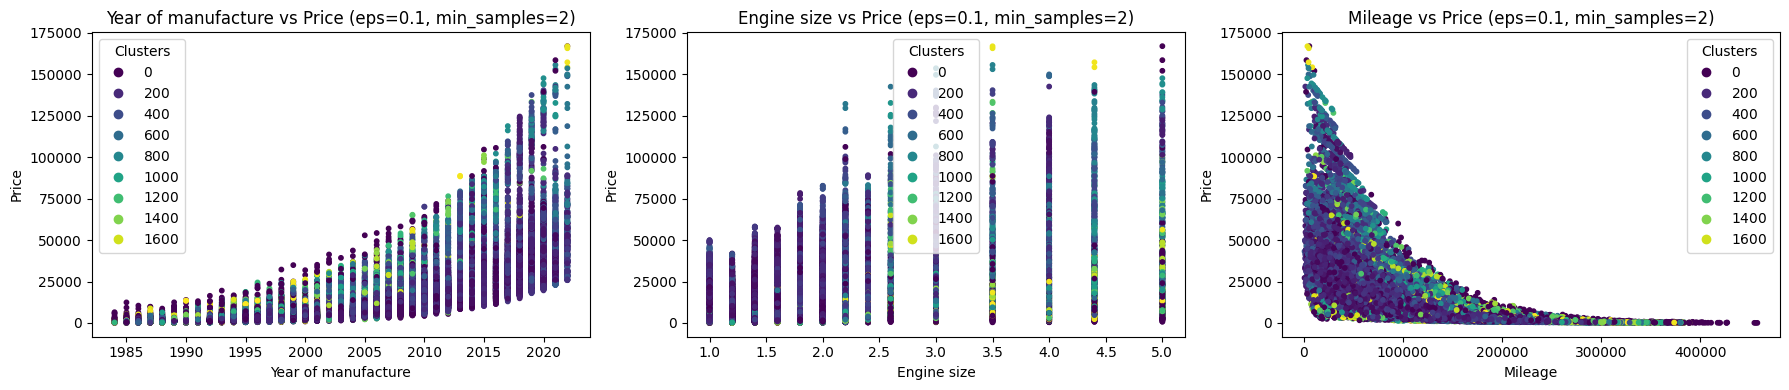

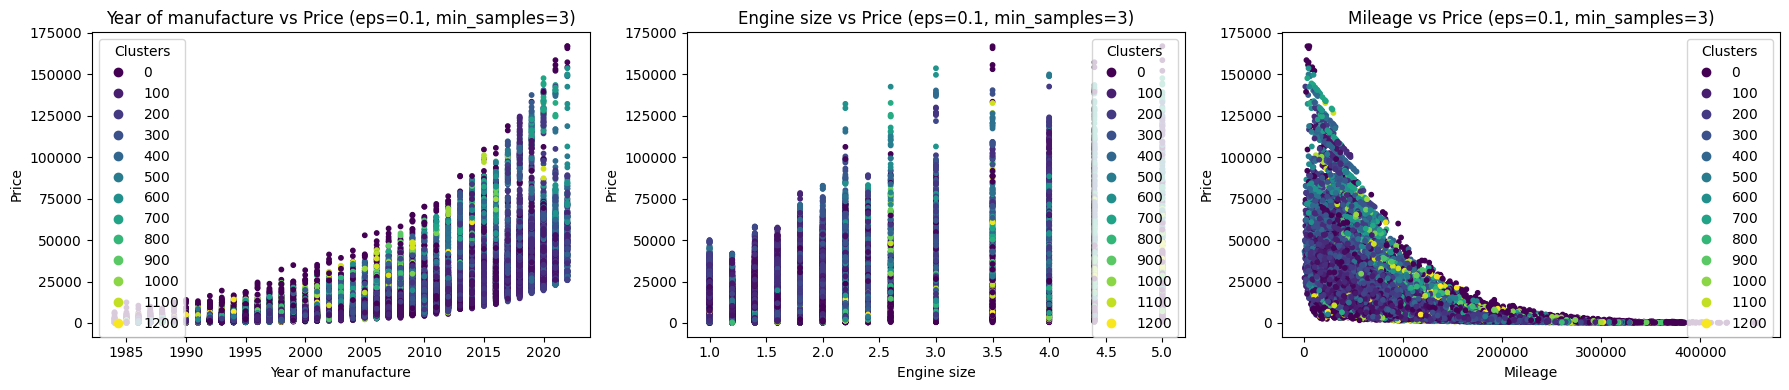

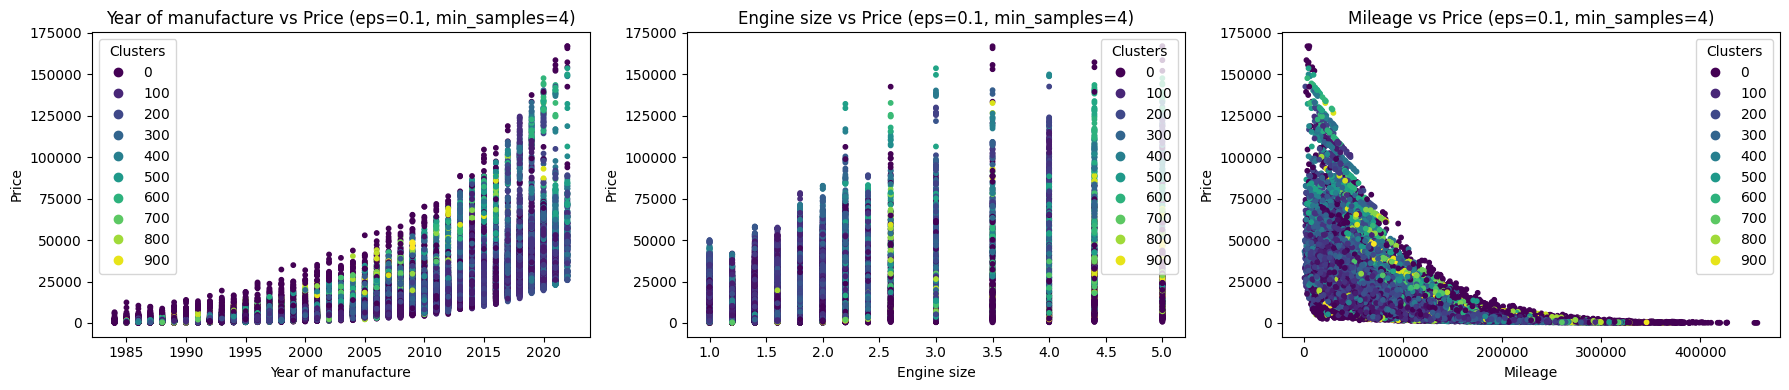

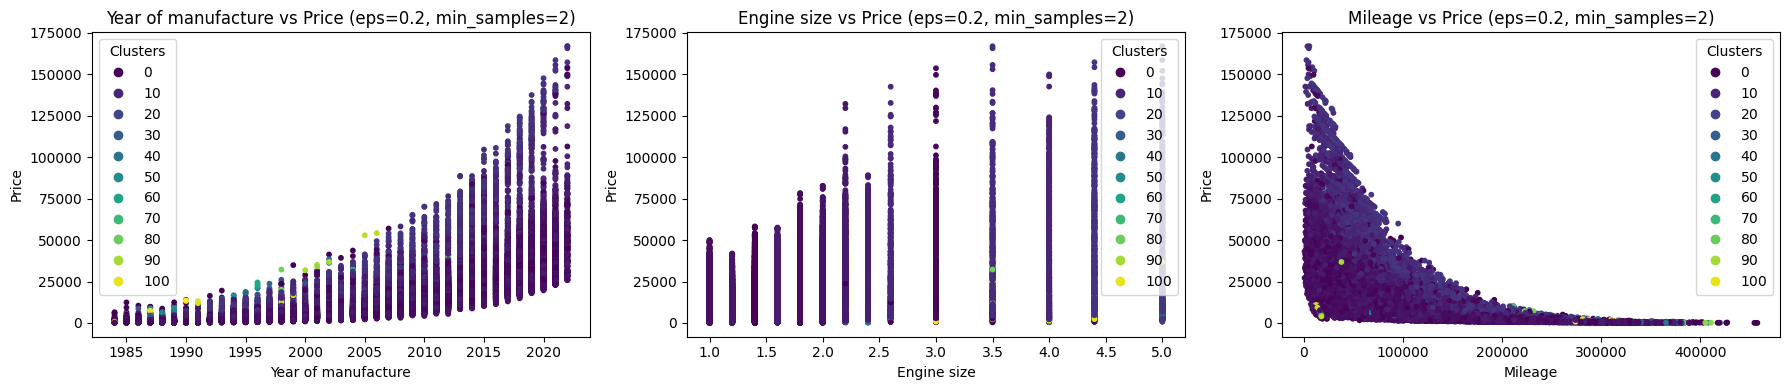

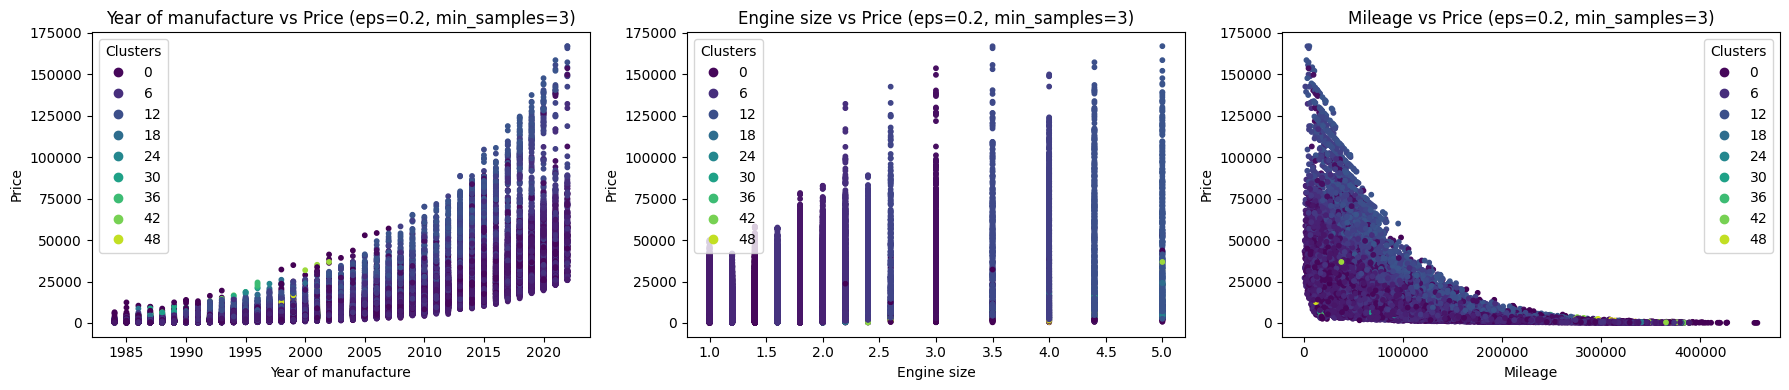

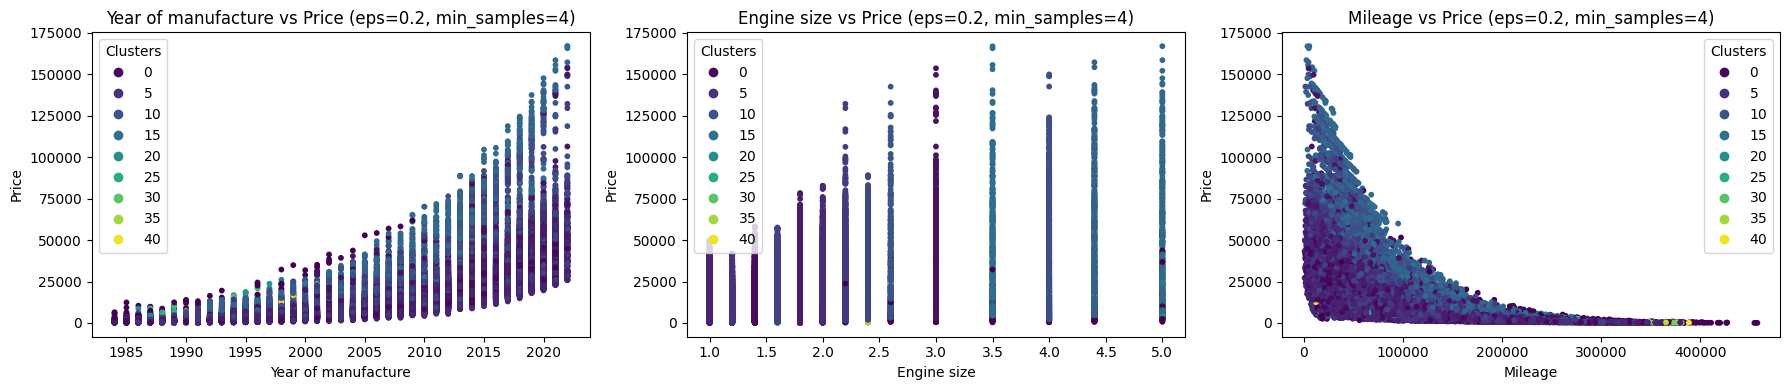

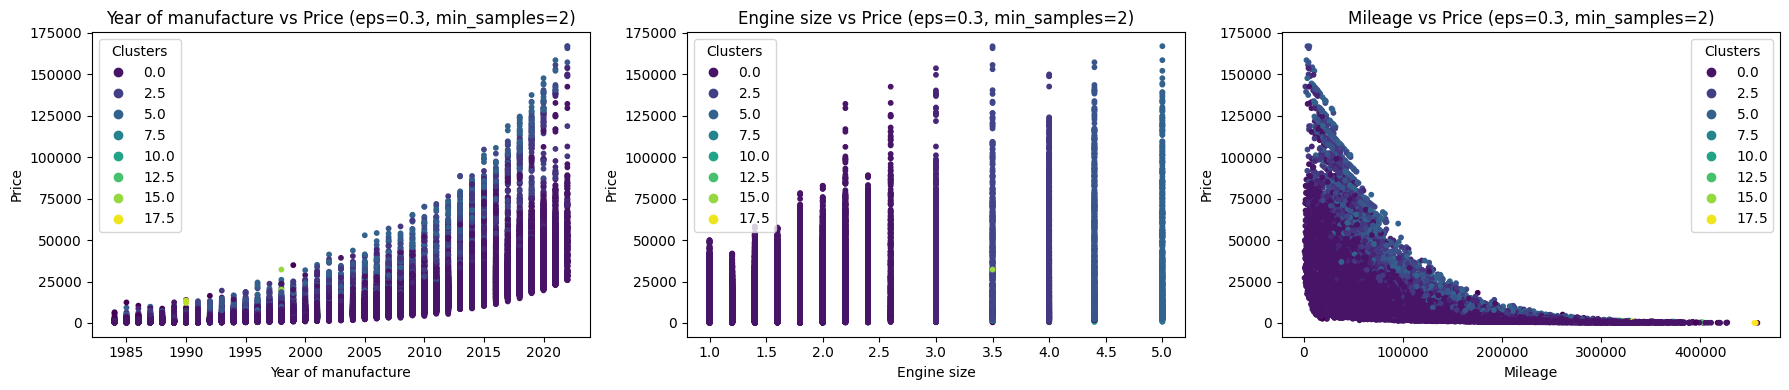

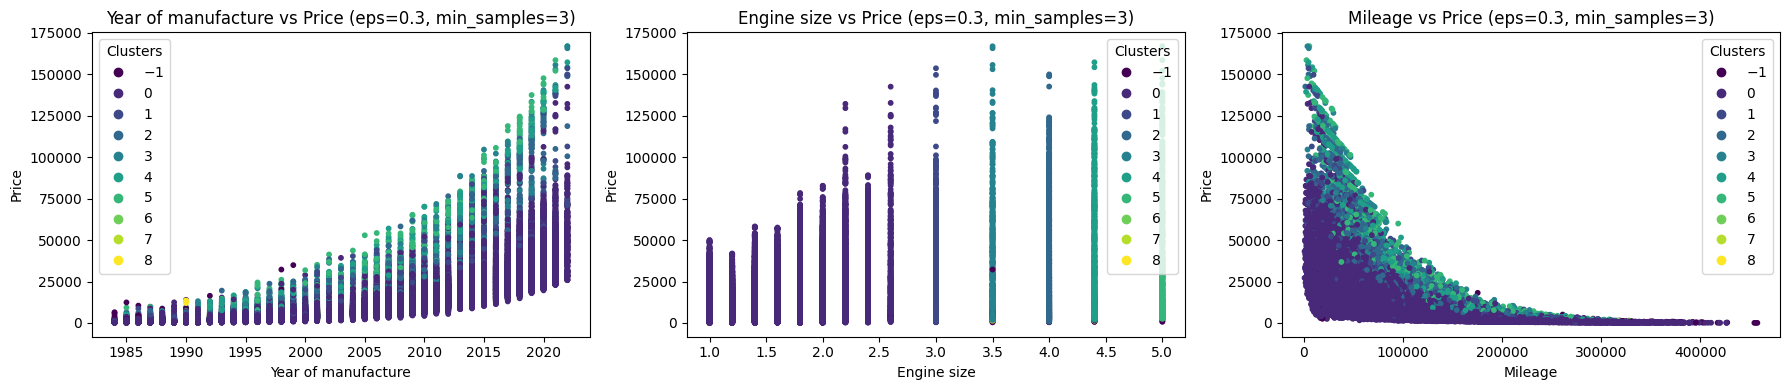

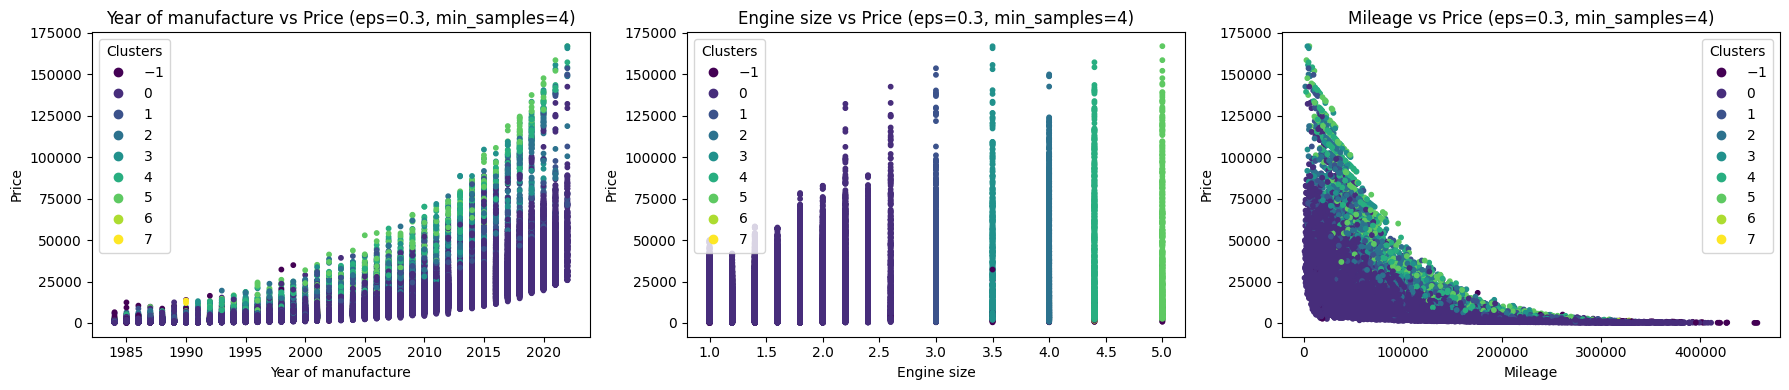

Clustering results:
eps=0.1, min_samples=2, Silhouette score=-0.128, Davies Bouldin index=2.061
eps=0.1, min_samples=3, Silhouette score=-0.147, Davies Bouldin index=2.354
eps=0.1, min_samples=4, Silhouette score=-0.163, Davies Bouldin index=2.598
eps=0.2, min_samples=2, Silhouette score=-0.227, Davies Bouldin index=2.082
eps=0.2, min_samples=3, Silhouette score=-0.143, Davies Bouldin index=2.793
eps=0.2, min_samples=4, Silhouette score=-0.151, Davies Bouldin index=3.090
eps=0.3, min_samples=2, Silhouette score=0.192, Davies Bouldin index=2.149
eps=0.3, min_samples=3, Silhouette score=0.238, Davies Bouldin index=3.445
eps=0.3, min_samples=4, Silhouette score=0.255, Davies Bouldin index=2.563


In [33]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

def dbscan_clustering(df, input_cols, output_col, eps_values, min_samples_values):
    """
    Performs DBSCAN clustering on the input data with different values of eps and min_samples.

    Parameters:
    df (pandas DataFrame): The input data.
    input_cols (list): The list of input columns.
    output_col (str): The name of the output column.
    eps_values (list): The list of values of eps to try.
    min_samples_values (list): The list of values of min_samples to try.

    Returns:
    None
    """
    # Initialize a list to store the clustering results
    clustering_results = []

    # Loop through each value of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Create a DBSCAN clustering model
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)

            # Scale the input features
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(df[input_cols])

            # Fit the model to the scaled data
            dbscan.fit(X_scaled)

            # Get the cluster labels
            labels = dbscan.labels_

            # Add the cluster labels to the input data
            df['cluster'] = labels

            # Calculate the silhouette score
            silhouette = silhouette_score(X_scaled, labels)

            # Calculate the Davies Bouldin index
            db_index = davies_bouldin_score(X_scaled, labels)

            # Store the clustering results
            clustering_results.append((eps, min_samples, silhouette, db_index))

            # Plot the clusters for each input column against the output column
            num_plots = len(input_cols)
            fig, axs = plt.subplots(1, num_plots, figsize=(18, 4))

            for i, input_col in enumerate(input_cols):
                scatter = axs[i].scatter(df[input_col], df[output_col], c=df['cluster'], cmap='viridis', s=10)
                axs[i].set_xlabel(input_col)
                axs[i].set_ylabel(output_col)
                axs[i].set_title(f'{input_col} vs {output_col} (eps={eps}, min_samples={min_samples})')
                axs[i].legend(*scatter.legend_elements(), title="Clusters")

            plt.tight_layout()
            plt.show()

    # Print the clustering results
    print('Clustering results:')
    for eps, min_samples, silhouette, db_index in clustering_results:
        print(f'eps={eps}, min_samples={min_samples}, Silhouette score={silhouette:.3f}, Davies Bouldin index={db_index:.3f}')

# Example usage
input_cols = ['Year of manufacture', 'Engine size', 'Mileage']
output_col = 'Price'
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [2, 3, 4]
dbscan_clustering(car_sales, input_cols, output_col, eps_values, min_samples_values)


# Exercise 2: Image Recognition to Identify Handwritten Digits (CNN)

In [53]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Exercise 2: a

In [64]:
#load the MNIST dataset from TensorFlow:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9108 - loss: 0.3040
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9836 - loss: 0.0552
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9900 - loss: 0.0320
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.0505
Test accuracy: 0.9855999946594238
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


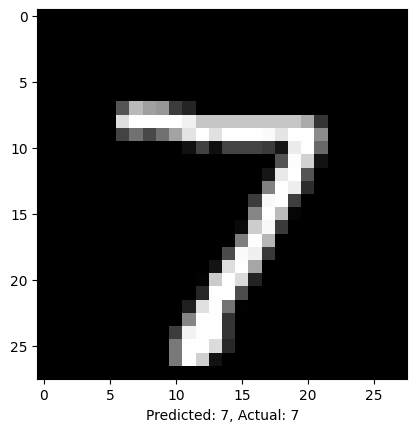

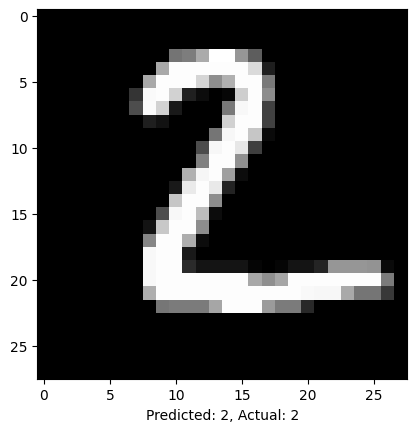

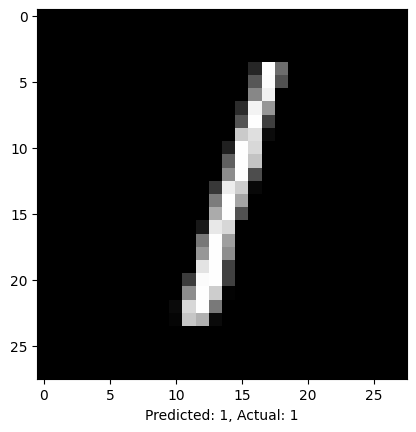

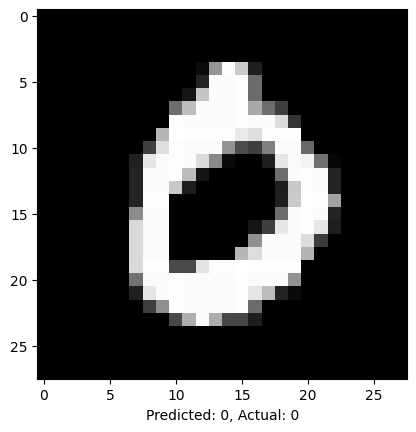

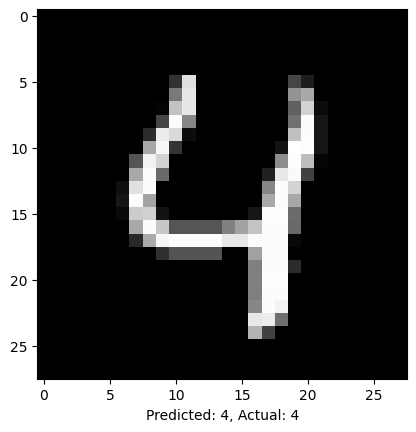

In [65]:
# Create an Input layer with the desired input shape
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))

# Add the Conv2D layer
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(input_layer)

# Add the MaxPooling2D layer
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

# Flatten the output
x = tf.keras.layers.Flatten()(x)

# Add the Dense layers
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model.predict(x_test)

# Plot some predicted digits
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.xlabel(f'Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}')
    plt.show()



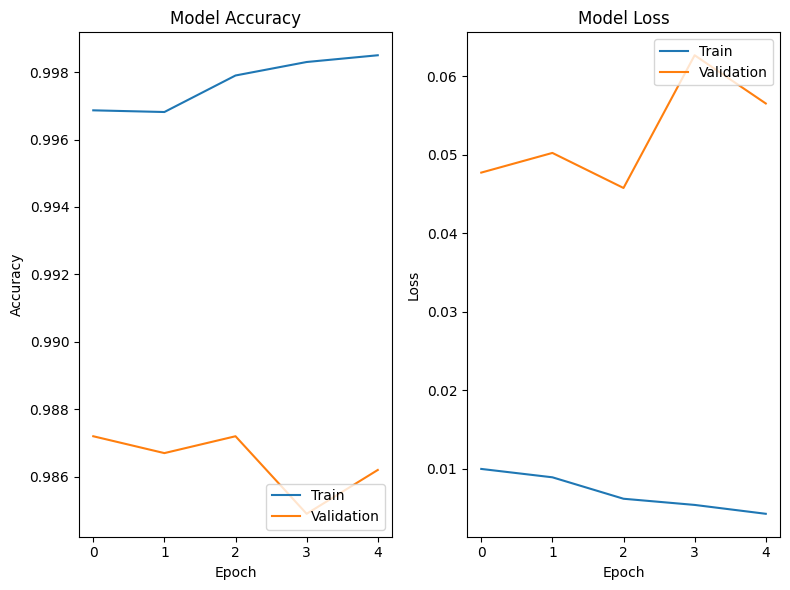

In [66]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Exercise 2:b & c

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8978 - loss: 0.3383
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9798 - loss: 0.0653
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9857 - loss: 0.0465
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9899 - loss: 0.0315
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9921 - loss: 0.0245
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9796 - loss: 0.0582
Test accuracy: 0.9857000112533569
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


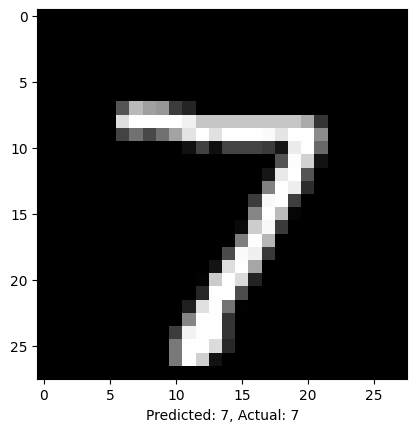

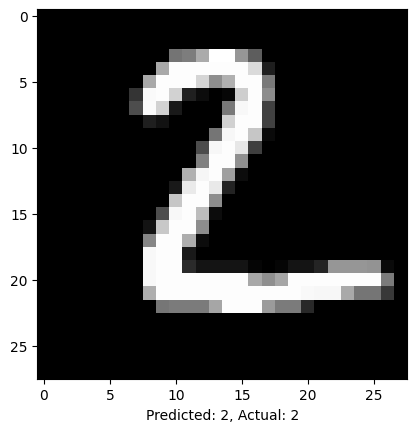

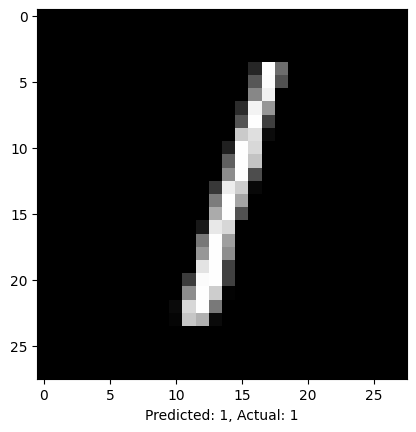

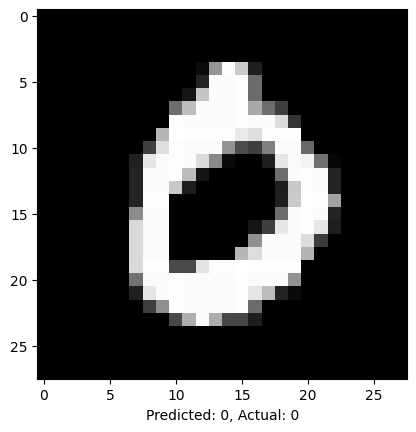

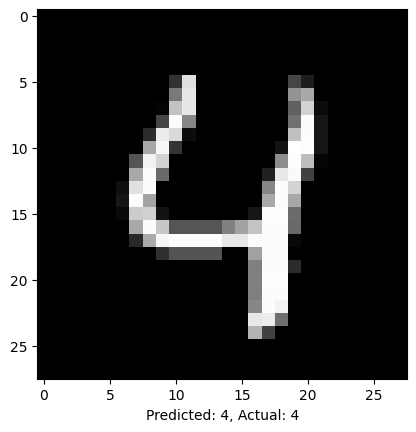

In [67]:
# Dropout Layer & Learning Rate
# Create an Input layer with the desired input shape
input_layer = tf.keras.layers.Input(shape=(28, 28, 1))

# Add the Conv2D layer
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(input_layer)

# Add the MaxPooling2D layer
x = tf.keras.layers.MaxPooling2D((2,2))(x)

# Flatten the output
x = tf.keras.layers.Flatten()(x)

# Add the Dense layers with Dropout
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs=input_layer, outputs=x)

# Compile the model with learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model.predict(x_test)

# Plot some predicted digits
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.xlabel(f'Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}')
    plt.show()

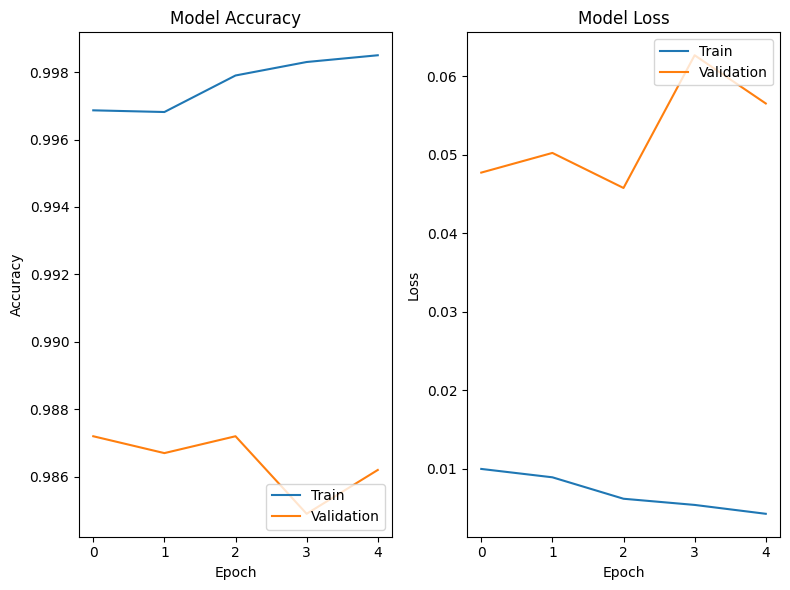

In [68]:
# Plot the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


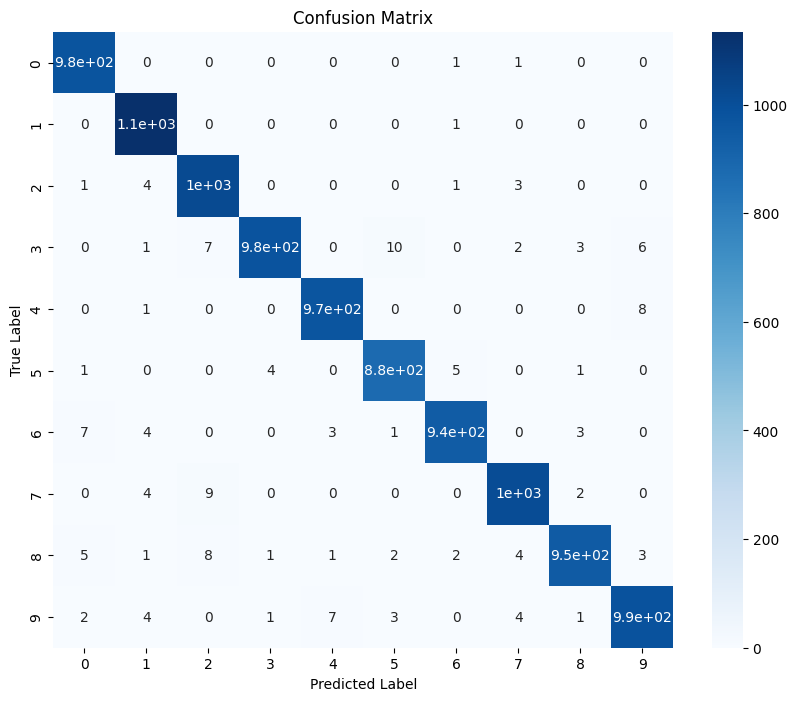

In [69]:
from sklearn.metrics import confusion_matrix

# Calculate and plot the confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()